In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = Path('./WikiTextTR')

In [4]:
path.ls()

[WindowsPath('WikiTextTR/AA'),
 WindowsPath('WikiTextTR/AB'),
 WindowsPath('WikiTextTR/AC'),
 WindowsPath('WikiTextTR/AD'),
 WindowsPath('WikiTextTR/AE'),
 WindowsPath('WikiTextTR/AF'),
 WindowsPath('WikiTextTR/data_lm.pkl'),
 WindowsPath('WikiTextTR/models'),
 WindowsPath('WikiTextTR/temp.csv'),
 WindowsPath('WikiTextTR/test.csv'),
 WindowsPath('WikiTextTR/tmp'),
 WindowsPath('WikiTextTR/train.csv'),
 WindowsPath('WikiTextTR/Wiki_Turkish_Corpus.csv'),
 WindowsPath('WikiTextTR/Wiki_Turkish_Corpus2.csv'),
 WindowsPath('WikiTextTR/Wiki_Turkish_Corpus3.csv'),
 WindowsPath('WikiTextTR/Wiki_Turkish_Corpus5.csv')]

In [5]:
LANG_FILENAMES = [str(f) for f in path.rglob("*/*")]
print(len(LANG_FILENAMES))
print(LANG_FILENAMES[:5])

510
['WikiTextTR\\AA\\wiki_00', 'WikiTextTR\\AA\\wiki_01', 'WikiTextTR\\AA\\wiki_02', 'WikiTextTR\\AA\\wiki_03', 'WikiTextTR\\AA\\wiki_04']


In [6]:
LANG_TEXT = []
for i in LANG_FILENAMES:
    try:
        for line in open(i, encoding="utf-8"):
            LANG_TEXT.append(json.loads(line))
    except:
        break
LANG_TEXT = pd.DataFrame(LANG_TEXT)

In [7]:
LANG_TEXT.head()

,id,url,title,text
0,10,https://tr.wikipedia.org/wiki?curid=10,Cengiz Han,"Cengiz Han\n\nCengiz Han (""Cenghis Khan"", ""Çin..."
1,16,https://tr.wikipedia.org/wiki?curid=16,Film (anlam ayrımı),Film (anlam ayrımı)\n\nFilm şu anlamlara geleb...
2,22,https://tr.wikipedia.org/wiki?curid=22,Mustafa Suphi,Mustafa Suphi\n\nMehmet Mustafa Suphi (4 Ağust...
3,24,https://tr.wikipedia.org/wiki?curid=24,Linux,"Linux\n\nLinux (telaffuz: ""Lin-uks""); bilgisay..."
4,30,https://tr.wikipedia.org/wiki?curid=30,Bolşevizm,"Bolşevizm\n\nBolşevik, ""çoğunluktan yana"" anla..."


In [9]:
LANG_TEXT.to_csv(f"{path}/Wiki_Turkish_Corpus.csv", index=False)

In [17]:
LANG_TEXT = pd.read_csv(f"{path}/Wiki_Turkish_Corpus.csv")

In [18]:
LANG_TEXT.head()

,id,url,title,text
0,10,https://tr.wikipedia.org/wiki?curid=10,Cengiz Han,"Cengiz Han\n\nCengiz Han (""Cenghis Khan"", ""Çin..."
1,16,https://tr.wikipedia.org/wiki?curid=16,Film (anlam ayrımı),Film (anlam ayrımı)\n\nFilm şu anlamlara geleb...
2,22,https://tr.wikipedia.org/wiki?curid=22,Mustafa Suphi,Mustafa Suphi\n\nMehmet Mustafa Suphi (4 Ağust...
3,24,https://tr.wikipedia.org/wiki?curid=24,Linux,"Linux\n\nLinux (telaffuz: ""Lin-uks""); bilgisay..."
4,30,https://tr.wikipedia.org/wiki?curid=30,Bolşevizm,"Bolşevizm\n\nBolşevik, ""çoğunluktan yana"" anla..."


In [19]:
LANG_TEXT.drop(["id","url","title"],axis=1,inplace=True)

In [13]:
LANG_TEXT = (LANG_TEXT.assign(labels = 0)
    .pipe(lambda x: x[['labels', 'text']])
    .to_csv(f"{path}/Wiki_Turkish_Corpus2.csv", index=False))
LANG_TEXT.head()

,labels,text
0,0,"Cengiz Han\n\nCengiz Han (""Cenghis Khan"", ""Çin..."
1,0,Film (anlam ayrımı)\n\nFilm şu anlamlara geleb...
2,0,Mustafa Suphi\n\nMehmet Mustafa Suphi (4 Ağust...
3,0,"Linux\n\nLinux (telaffuz: ""Lin-uks""); bilgisay..."
4,0,"Bolşevizm\n\nBolşevik, ""çoğunluktan yana"" anla..."


In [22]:
LANG_TEXT = pd.read_csv(f"{path}/Wiki_Turkish_Corpus2.csv")
LANG_TEXT.head()

,labels,text
0,0,"Cengiz Han\n\nCengiz Han (""Cenghis Khan"", ""Çin..."
1,0,Film (anlam ayrımı)\n\nFilm şu anlamlara geleb...
2,0,Mustafa Suphi\n\nMehmet Mustafa Suphi (4 Ağust...
3,0,"Linux\n\nLinux (telaffuz: ""Lin-uks""); bilgisay..."
4,0,"Bolşevizm\n\nBolşevik, ""çoğunluktan yana"" anla..."


In [23]:
def split_title_from_text(text):
    words = text.split("\n\n")
    if len(words) >= 2:
        return ''.join(words[1:])
    else:
        return ''.join(words)
    
LANG_TEXT['text'] = LANG_TEXT['text'].apply(lambda x: split_title_from_text(x))

In [24]:

LANG_TEXT.isna().any()

labels    False
text      False
dtype: bool

In [25]:
LANG_TEXT.shape

(343166, 2)

In [26]:
LANG_TEXT['text'].apply(lambda x: len(x.split(" "))).sum()

53673483

In [4]:
re1 = re.compile(r'  +')
def fixup(x):
    x = x.replace('ü', "u").replace('Ü', 'U').replace('ı', "i").replace(
        'ğ', 'g').replace('İ', 'I').replace('Ğ', "G").replace('ö', "o").replace(
        'Ö', "o").replace('\n\n', ' ').replace("\'",' ').replace('\n\nSection::::',' ').replace(
        '\n',' ').replace('\\', ' \\ ').replace('ç', 'c').replace('Ç', 'C').replace('ş', 's').replace('Ş', 'S')
    return re1.sub(' ', html.unescape(x))


In [28]:
LANG_TEXT.to_csv(f"{path}/Wiki_Turkish_Corpus3.csv", index=False)

In [30]:
LANG_TEXT = pd.read_csv(f"{path}/Wiki_Turkish_Corpus3.csv")#, chunksize=5000)
LANG_TEXT.head()

,labels,text
0,0,"Cengiz Han (""Cenghis Khan"", ""Çinggis Haan"" ya ..."
1,0,Film şu anlamlara gelebilir:
2,0,Mehmet Mustafa Suphi (4 Ağustos 1882 - 28 Ocak...
3,0,"Linux (telaffuz: ""Lin-uks""); bilgisayar işleti..."
4,0,"Bolşevik, ""çoğunluktan yana"" anlamına gelen Ru..."


In [62]:
import torch
torch.cuda.device(0)
torch.cuda.get_device_name(0)

'GeForce GTX 950M'

In [39]:
LANG_TEXT.dropna(axis=0, inplace=True)

In [40]:
df = LANG_TEXT.iloc[np.random.permutation(len(LANG_TEXT))]

In [41]:
cut1 = int(0.8 * len(df)) + 1
cut1

269988

In [42]:
df_train, df_valid = df[:cut1], df[cut1:]

In [43]:
df = LANG_TEXT.iloc[np.random.permutation(len(LANG_TEXT))]
cut1 = int(0.8 * len(df)) + 1
df_train, df_valid = df[:cut1], df[cut1:]

In [44]:
df_train.shape, df_valid.shape

((269988, 2), (67496, 2))

In [45]:
df_train.head()

,labels,text
292313,0,7. Avrupa Erkekler ve Kadınlar Artistik Jimnas...
177947,0,"Arıcılar, Muğla'nın Ula ilçesine bağlı bir .Ar..."
274701,0,"Adrián Navarro (d. 24 Ekim 1969; Laferrere, Bu..."
260118,0,"Yuta Suzuki (d. 28 Mayıs 1987), Japon futbolcu..."
18999,0,"Andromeda Galaksisi, ayrıca Messier 31, M31 ve..."


In [ ]:
data_lm = TextLMDataBunch.from_df(path, train_df=df_train, valid_df= df_valid, label_cols="labels", text_cols="text")

In [26]:
data_lm.save('data_lm.pkl')

In [4]:
bs=16
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [48]:
data_lm.show_batch()

idx,text
0,xxmaj duke xxmaj üniversitesi'nden oyun kurucu xxmaj xxunk xxmaj xxunk seçmiştir . xxmaj section xxrep 4 : xxmaj draft seçimlerini etkileyen xxunk . \n xxmaj section xxrep 4 : xxmaj draft öncesi xxunk . \n xxmaj aşağıdaki xxunk ve takımlar arasındaki draft seçim hakları değişimleri draft gününden daha önce kararlaştırılmıştır . \n xxbos 1985 xxmaj dünya xxmaj güreş xxmaj şampiyonası serbest ve grekoromen stil kategorilerinde 23 .
1,"4 : xxmaj xxunk : xxmaj xxunk . \n xxmaj xxunk xxunk büyük xxunk biridir . xxmaj yüksek oranda grafiksel gelişme ile yeni bir xxunk arayüzü çıkarılmıştır . xxmaj her oyuncu oyuna , gelişmemiş hammadde alanları ile çevrili küçük ve gelişmemiş bir köyün önderi olarak başlar . xxmaj bu alanları geliştirmek , hammadde alanlarının verimini arttırır . xxmaj köy , yeni binalar inşa ederek ve"
2,", 2012 - 2013 yılları arasında gsyi̇h'nın % xxunk katkıda bulunmuş , 2001'den bu yana yıllık % xxunk üzerinde büyüme oranı ile dünyanın en hızlı büyüyen xxmaj hizmetler xxunk birine sahiptir . xxmaj hindistan , 2013 - 2014 yılları arasında xxunk milyar dolarlık hizmet ihracatı ile xxup bt hizmetleri , xxup xxunk hizmetleri ve yazılım ana dış xxunk haline gelmiştir . xxmaj aynı zamanda bu ekonominin en hızlı büyüyen kısmıdır"
3,"fizik xxmaj xxunk araştırma görevlisi olmuştur . 1951 - 1954 "" xxmaj stockholm xxmaj kraliyet xxmaj teknoloji xxmaj xxunk fizik profesörlüğü yapmıştır . 1954 yılından 1984 yılında emekli olana kadar xxmaj uppsala xxmaj üniversitesi xxmaj fizik xxmaj bölümü başkanlığı ve profesörlük yapmıştır . xxmaj emekli olduktan sonra da çalışmalarını devam ettirmiştir . \n xxmaj section xxrep 4 : xxmaj ödül ve xxmaj başarıları . \n xxmaj section xxrep"
4,"hastalık türü yalnızca izlenir . xxmaj xxunk xxunk ise çoğunlukla ilaç tedavisi ve ardından cerrahi müdahale gerektirir . xxmaj tedavide xxunk kullanılır ve yıllarca kullanılması gerekebilir . xxmaj xxunk hastalık ölümle xxunk . xxmaj section xxrep 4 : xxmaj epidemiyoloji . \n xxmaj bu hastalık dünyanın çoğu bölgesinde görülür ve şu an tahminen bir milyon kişiyi etkilemektedir . xxmaj güney xxmaj amerika , xxmaj afrika ve xxmaj asya’nın bazı"


In [5]:
learner = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [ ]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time


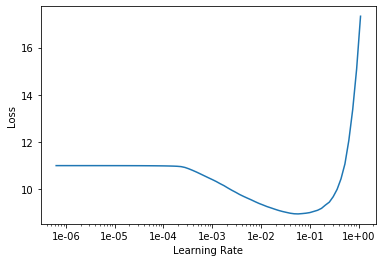

In [8]:
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time


In [10]:
learner.save("model1")

In [50]:
learner.load("model1")

RuntimeError: CUDA out of memory. Tried to allocate 22.00 MiB (GPU 0; 4.00 GiB total capacity; 440.44 MiB already allocated; 2.57 GiB free; 474.00 MiB reserved in total by PyTorch)

In [12]:
TEXT = "Birinci dünya savaşında"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learner.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Birinci dünya savaşında Ahmet Derlediği adında bir kısmı San Hasan Rüstem tarafından evlendi ve bu sırada Facebook de Harekatın olarak verilmiştir . Önemli bir yasal Google Beyin Kaya Seferi ve
Birinci dünya savaşında en büyük ve en fazla kitap , en iyi iki Amerikan bölgesinde . Devlet , Türkiye'nin , Avrupa'nın kısa ve Kadın Fakültesi ( İngilizce : Memlük ) , İsa Sonradan


In [36]:
file = open("itos.pkl","wb")
pickle.dump(data_lm.vocab.itos, file)

In [37]:
file.close()